In [3]:
import pandas as pd
import matplotlib.pyplot as plt

1. Caricare in un dataframe le informazioni presenti nel foglio ‘customers’ del file BikeStores
presenta al link

In [4]:
df = pd.read_excel("https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true", "customers")
df

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,NaN,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127.0
1,2,Kasha,Todd,NaN,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008.0
2,3,Tameka,Fisher,NaN,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278.0
3,4,Daryl,Spence,NaN,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553.0
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820.0
...,...,...,...,...,...,...,...,...,...
1440,1441,Jamaal,Morrison,NaN,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301.0
1441,1442,Cassie,Cline,NaN,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201.0
1442,1443,Lezlie,Lamb,NaN,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722.0
1443,1444,Ivette,Estes,NaN,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424.0


2. Visualizzare i nominativi dei clienti di cui non si conosce né il numero di telefono né la mail

In [5]:
df.loc[(df['email'].isnull()) & (df['phone'].isnull()),['first_name','last_name']]

,first_name,last_name
180,Olevia,Pitts
184,Morton,Lee
238,Felice,Guzman
239,Le,Deleon


In [6]:
#serve per proseguire con gli esercizi, ma non è una consegna
df = df.dropna()

3. Visualizzare l’indirizzo dei clienti che usano gmail come propria mail personale

In [7]:
df.loc[df['email'].str.contains('gmail'), ["email"]]

,email
25,theo.reese@gmail.com
66,tommie.melton@gmail.com
119,luz.house@gmail.com
169,regine.gonzales@gmail.com
177,genoveva.tyler@gmail.com
227,whitney.estes@gmail.com
249,ivonne.yang@gmail.com
261,rubin.decker@gmail.com
346,kanesha.hudson@gmail.com
441,alane.munoz@gmail.com


4. Eliminare la colonna customer_id dal dataframe

In [8]:
df.drop(columns=('customer_id'), inplace = True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,first_name,last_name,phone,email,street,city,state,zip_code
4,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820.0
6,Latasha,Hays,(716) 986-3359,latasha.hays@hotmail.com,7014 Manor Station Rd.,Buffalo,NY,14215.0
11,Robby,Sykes,(516) 583-7761,robby.sykes@hotmail.com,486 Rock Maple Street,Hempstead,NY,11550.0
15,Emmitt,Sanchez,(212) 945-8823,emmitt.sanchez@hotmail.com,461 Squaw Creek Road,New York,NY,10002.0
25,Theo,Reese,(562) 215-2907,theo.reese@gmail.com,8755 W. Wild Horse St.,Long Beach,NY,11561.0
...,...,...,...,...,...,...,...,...
1417,Penni,Best,(657) 611-2991,penni.best@msn.com,875 Second Drive,Anaheim,CA,92806.0
1422,Dollie,Cervantes,(682) 362-7457,dollie.cervantes@aol.com,8828 Applegate Drive,Fort Worth,TX,76110.0
1425,Londa,Gould,(361) 206-5550,londa.gould@aol.com,9169 Beech Lane,Corpus Christi,TX,78418.0
1429,Tayna,Wade,(661) 858-1224,tayna.wade@hotmail.com,65 Smith Store Dr.,Bakersfield,CA,93306.0


5. Calcolare il numero di clienti per ogni stato e visualizzare queste informazioni in un pie chart.
Dare un nome appropriato al titolo del grafico

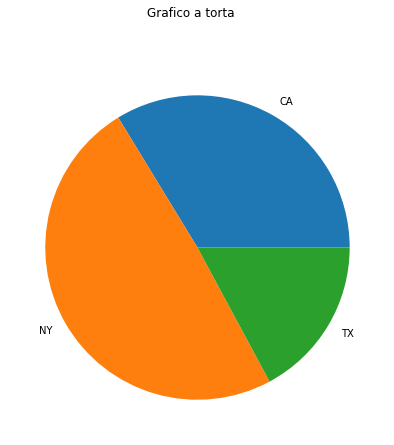

In [9]:
df1 = df.groupby('state', as_index=False)['first_name'].count()
fig= plt.figure(figsize = (7,7))
ax = plt.axes()
fig.suptitle('Grafico a torta')
ax.pie(df1['first_name'], labels = df1['state'])
plt.show()

6. Calcolare il numero di clienti di ogni città. Visualizzare il nome della città e il numero di clienti
che risiedono in quella città. Ordinare in ordine decrescente sul numero di clienti e visualizzare le
informazioni in un grafico a barre orizzontali. Dare un nome appropriato al titolo del grafico e agli assi

In [10]:
df2 = df.groupby('city', as_index=False)['first_name'].count().sort_values(by='first_name',ascending=False)
df2

,city,first_name
1,Anaheim,10
24,Troy,10
18,Oxnard,10
12,Long Beach,10
11,Lancaster,9
3,Brentwood,9
4,Buffalo,9
19,Rochester,9
10,Houston,9
5,Corpus Christi,8


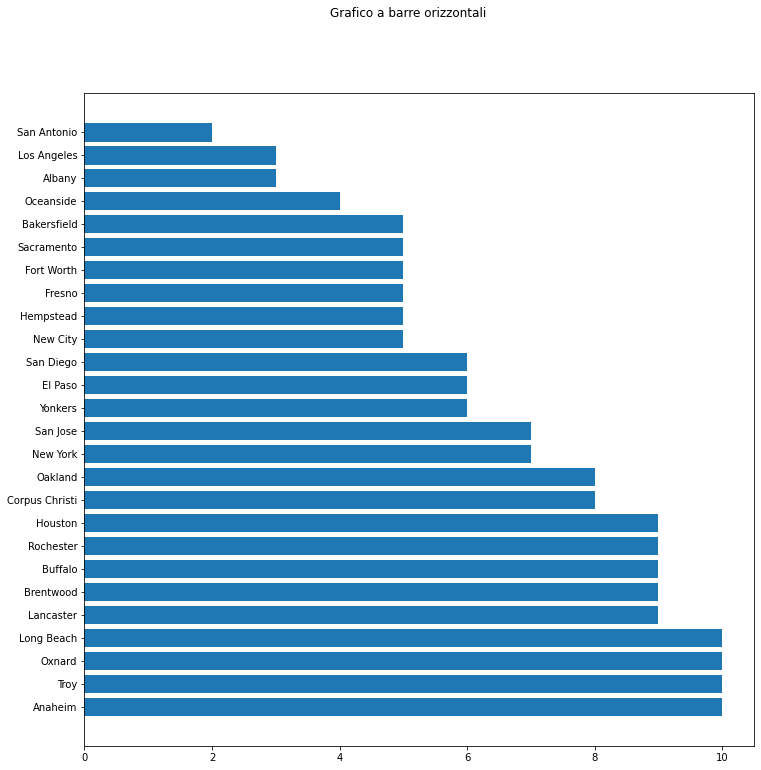

In [12]:
fig= plt.figure(figsize = (12,12))
ax = plt.axes()
fig.suptitle('Grafico a barre orizzontali')
ax.barh(df2['city'], df2['first_name'])
plt.show()

7. Visualizzare le città che hanno un numero di clienti compreso tra 10 e 20. Visualizzare il nome
della città e il numero di clienti.

In [21]:
df2.loc[(df2['first_name'] < 20) & (df2['first_name'] > 10)]

,city,first_name


8. Calcolare il numero di città per ogni stato. Visualizzare il nome dello stato e il numero delle
città

In [25]:
df3 = df.groupby('state', as_index = False)['city'].count()
df3

,state,city
0,CA,59
1,NY,86
2,TX,30


9. Eliminare dal dataframe tutti i clienti di Buffalo di cui non si conosce il telefono

In [26]:
df4 = df.drop(df[df['city'].str.contains('Buffalo') & df['phone'].isnull()].index) 
df4

,first_name,last_name,phone,email,street,city,state,zip_code
4,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820.0
6,Latasha,Hays,(716) 986-3359,latasha.hays@hotmail.com,7014 Manor Station Rd.,Buffalo,NY,14215.0
11,Robby,Sykes,(516) 583-7761,robby.sykes@hotmail.com,486 Rock Maple Street,Hempstead,NY,11550.0
15,Emmitt,Sanchez,(212) 945-8823,emmitt.sanchez@hotmail.com,461 Squaw Creek Road,New York,NY,10002.0
25,Theo,Reese,(562) 215-2907,theo.reese@gmail.com,8755 W. Wild Horse St.,Long Beach,NY,11561.0
...,...,...,...,...,...,...,...,...
1417,Penni,Best,(657) 611-2991,penni.best@msn.com,875 Second Drive,Anaheim,CA,92806.0
1422,Dollie,Cervantes,(682) 362-7457,dollie.cervantes@aol.com,8828 Applegate Drive,Fort Worth,TX,76110.0
1425,Londa,Gould,(361) 206-5550,londa.gould@aol.com,9169 Beech Lane,Corpus Christi,TX,78418.0
1429,Tayna,Wade,(661) 858-1224,tayna.wade@hotmail.com,65 Smith Store Dr.,Bakersfield,CA,93306.0
